In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


/home/vturino/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
plot_loc = '/home/vturino/PhD/projects/exhumation/plots/single_models/'
cttV_mod = "kinematic_mu0.13_basalt7.5km_sed1km_cttV"
Vto50_mod = "kinematic_mu0.13_basalt7.5km_sed1km_Vto50pc"
Vto0_mod = "kinematic_mu0.13_basalt7.5km_sed1km_Vto0"

cttV = pd.read_csv(f"{plot_loc}{cttV_mod}/txt_files/exhumed_times.txt", sep="\s+")
Vto50 = pd.read_csv(f"{plot_loc}{Vto50_mod}/txt_files/exhumed_times.txt", sep="\s+")
Vto0 = pd.read_csv(f"{plot_loc}{Vto0_mod}/txt_files/exhumed_times.txt", sep="\s+")


In [3]:
# # Find particles with lithology = oc that are in cttV but not in Vto50 and Vto0
oc_cttV = cttV.loc[cttV['lithology'] == 'oc']
oc_Vto50 = Vto50.loc[Vto50['lithology'] == 'oc']
oc_Vto0 = Vto0.loc[Vto0['lithology'] == 'oc']

# oc_cttV_not_Vto50 = oc_cttV.loc[~oc_cttV['id'].isin(oc_Vto50['id'])]
# oc_cttV_not_Vto0 = oc_cttV.loc[~oc_cttV['id'].isin(oc_Vto0['id'])]

# # Find particles both in oc_cttV_not_Vto50 and oc_cttV_not_Vto0
# oc_cttV_not_Vto50_not_Vto0 = oc_cttV_not_Vto50.loc[oc_cttV_not_Vto50['id'].isin(oc_cttV_not_Vto0['id'])]
oc_cttV_not_Vto50_and_Vto0 = oc_cttV.loc[~oc_cttV['id'].isin(oc_Vto50['id']) & ~oc_cttV['id'].isin(oc_Vto0['id'])]


In [4]:
oc_cttV_not_Vto50_and_Vto0.reset_index(drop=True, inplace=True)

<built-in function id>


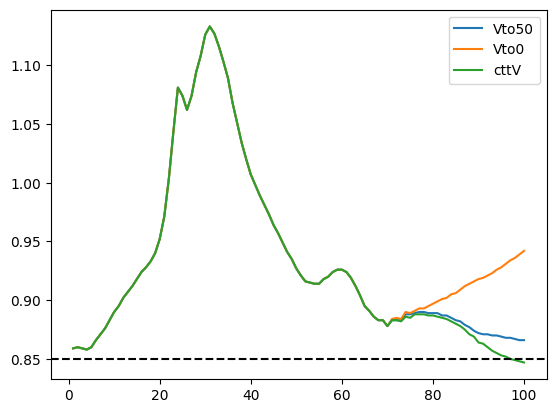

In [5]:
for i in [41]:
    print(id)
    id = oc_cttV_not_Vto50_and_Vto0['id'].iloc[i]
    part50 = pd.read_csv(f"{plot_loc}{Vto50_mod}/txt_files/PT/pt_part_{id}.txt", sep="\s+")
    part0 = pd.read_csv(f"{plot_loc}{Vto0_mod}/txt_files/PT/pt_part_{id}.txt", sep="\s+")
    part100 = pd.read_csv(f"{plot_loc}{cttV_mod}/txt_files/PT/pt_part_{id}.txt", sep="\s+")

    plt.plot(part50['time'], part50['Plith'], label='Vto50')
    plt.plot(part0['time'], part0['Plith'], label='Vto0')
    plt.plot(part100['time'], part100['Plith'], label='cttV')

    plt.axhline(y=0.75*part100.Plith.max(), color='k', linestyle='--')

    plt.legend()

In [18]:
early = cttV[(cttV["ti"] <= 40) & (cttV["lithology"] == "oc") & (cttV["Pm"] > 0.6)]
late = cttV[cttV["ti"] > 40]

e5 = early.sample(5)
l5 = late.sample(5)

print("early:\n", e5.id)
print("late:\n",l5.id)

early:
 804     28028
1905    30962
1982    30970
457      7464
2386    40006
Name: id, dtype: int64
late:
 1930    31008
1921    30940
1882    30928
1884    30929
1872    30918
Name: id, dtype: int64


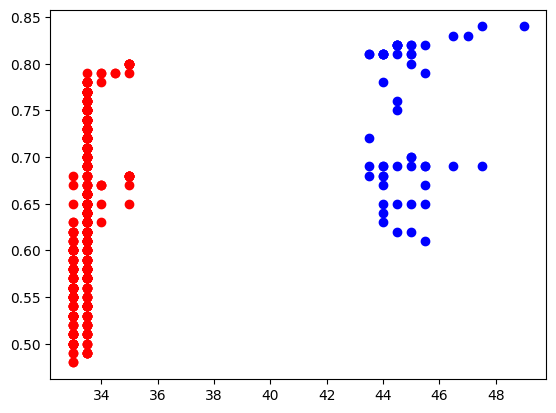

In [13]:
early = Vto50[(Vto50["ti"] <= 40) & (Vto50["lithology"] == "oc")]
late = Vto50[Vto50["ti"] > 40]

plt.scatter(early["ti"], early["Pm"], color='r', label='early')
plt.scatter(late["ti"], late["Pm"], color='b', label='late')


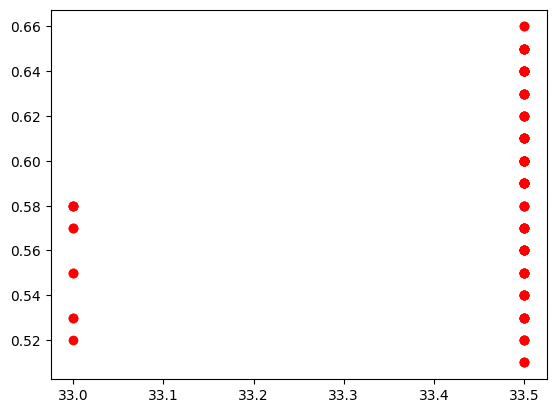

In [14]:
early = Vto0[(Vto0["ti"] <= 40) & (Vto0["lithology"] == "oc")]
late = Vto0[Vto0["ti"] > 40]

plt.scatter(early["ti"], early["Pm"], color='r', label='early')
plt.scatter(late["ti"], late["Pm"], color='b', label='late')

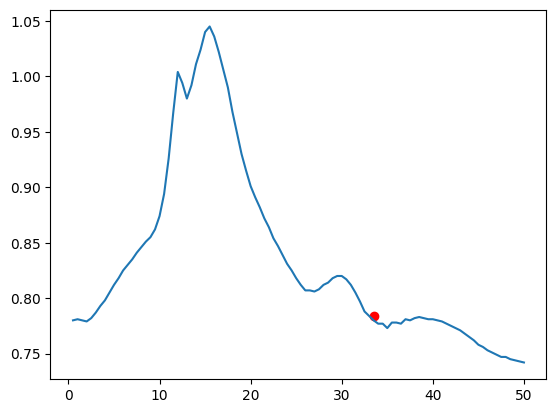

In [28]:
part = pd.read_csv(f"{plot_loc}{cttV_mod}/txt_files/PT/pt_part_30962.txt", sep="\s+")
Pmax = part['Plith'].max()
tmax = part.loc[part['Plith'] == Pmax, 'time'].values[0]
Pthresh = 0.75*Pmax
part_after_tmax = part.loc[part['time'] > tmax]
tthresh = part_after_tmax.loc[part_after_tmax['Plith'] < Pthresh, 'time'].min()

plt.plot(part['time']/2, part['Plith'])
plt.scatter(tthresh/2, Pthresh, color='r')

In [26]:
# in cttV, find the particle with id = 30962
cttV[cttV['id'] == 30962]


,id,lithology,Pm,tm,Tm,time_interval,ti,tf
1905,30962,oc,0.77,41.75,189.22,16.5,33.5,50.0
